<a href="https://colab.research.google.com/github/Ostrich2002/SRiSHTi23/blob/main/SRiSHTi'23_asignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [7]:
#For 7 neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
scores = knn.score(X_test,y_test)
print("Score after Z clipping", scores)

Score after Z clipping 0.9521276595744681


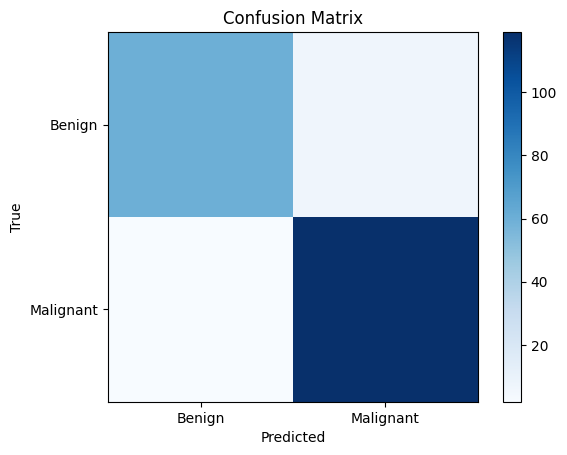

Precision: 0.9444444444444444
Recall: 0.9834710743801653
F1-score: 0.9635627530364373


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict labels for the test set
y_pred = knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


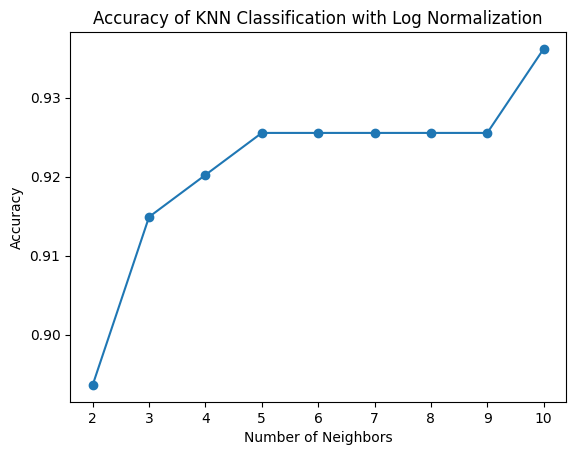

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

# Apply log normalization to one column of the feature matrix
# Apply log normalization to one column of the feature matrix
log_transformer = FunctionTransformer(func=np.log1p, validate=True)
column_index = 0  # Choose the column index to apply log normalization

X_train_log = X_train.copy()
X_train_log[:, column_index] = log_transformer.transform(X_train_log[:, column_index].reshape(-1, 1)).flatten()

X_test_log = X_test.copy()
X_test_log[:, column_index] = log_transformer.transform(X_test_log[:, column_index].reshape(-1, 1)).flatten()


# Perform KNN classification for different numbers of neighbors
n_neighbors = range(2, 11)
accuracy_scores = []

for k in n_neighbors:
    # Create KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier on the training data
    knn.fit(X_train_log, y_train)
    
    # Predict labels for the test data
    y_pred = knn.predict(X_test_log)
    
    # Calculate accuracy and store the score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different numbers of neighbors
plt.plot(n_neighbors, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN Classification with Log Normalization')
plt.show()


In [17]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

# Load the Iris dataset
data = load_iris()
X = data.data

# Apply feature normalization using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a list of distance metrics to compare
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Calculate pairwise distances using different metrics
for metric in distance_metrics:
    distances = pairwise_distances(X_scaled, metric=metric)
    print(f"Distance metric: {metric}")
    print(distances)
    print()


Distance metric: euclidean
[[0.         1.17621868 0.84560741 ... 3.80541169 3.82615742 3.33506444]
 [1.17621868 0.         0.52337301 ... 3.74663763 4.01734467 3.21347639]
 [0.84560741 0.52337301 0.         ... 3.93654113 4.07271581 3.38033614]
 ...
 [3.80541169 3.74663763 3.93654113 ... 0.         1.07184372 0.77529228]
 [3.82615742 4.01734467 4.07271581 ... 1.07184372 0.         1.20093044]
 [3.33506444 3.21347639 3.38033614 ... 0.77529228 1.20093044 0.        ]]

Distance metric: manhattan
[[0.         1.39331957 1.23209921 ... 7.37653556 6.60081629 6.32942654]
 [1.39331957 0.         0.7595667  ... 6.46788747 7.53374233 5.42077845]
 [1.23209921 0.7595667  0.         ... 7.22745417 7.37252196 6.18034515]
 ...
 [7.37653556 6.46788747 7.22745417 ... 0.         1.79286208 1.04710902]
 [6.60081629 7.53374233 7.37252196 ... 1.79286208 0.         2.11296388]
 [6.32942654 5.42077845 6.18034515 ... 1.04710902 2.11296388 0.        ]]

Distance metric: cosine
[[0.         0.13413743 0.064081

In [18]:
import os
os.system("wget https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv")

0

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Loading the dataset

data = pd.read_csv("Automobile_data.csv")
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [21]:
# Removing rows which have missing values

data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

159


In [22]:
# Dividing the dataset into features (X) and the target variable (y)

X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])

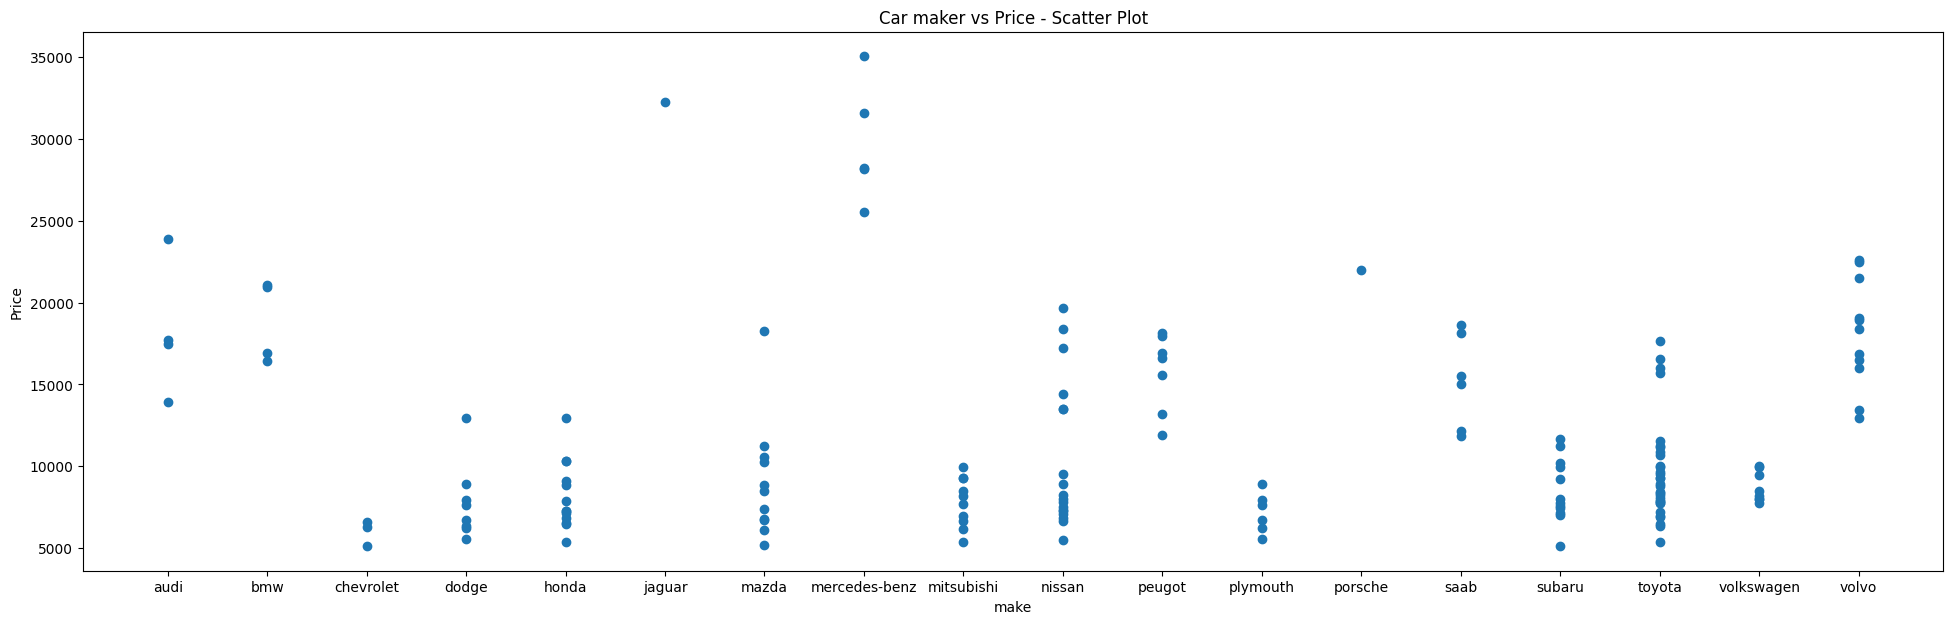

In [23]:
plt.figure(figsize = (24, 7))
plt.scatter(X["make"], y)
plt.xlabel('make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

Text(0.5, 1.0, 'Car Manufacturer vs Price - Box Plot')

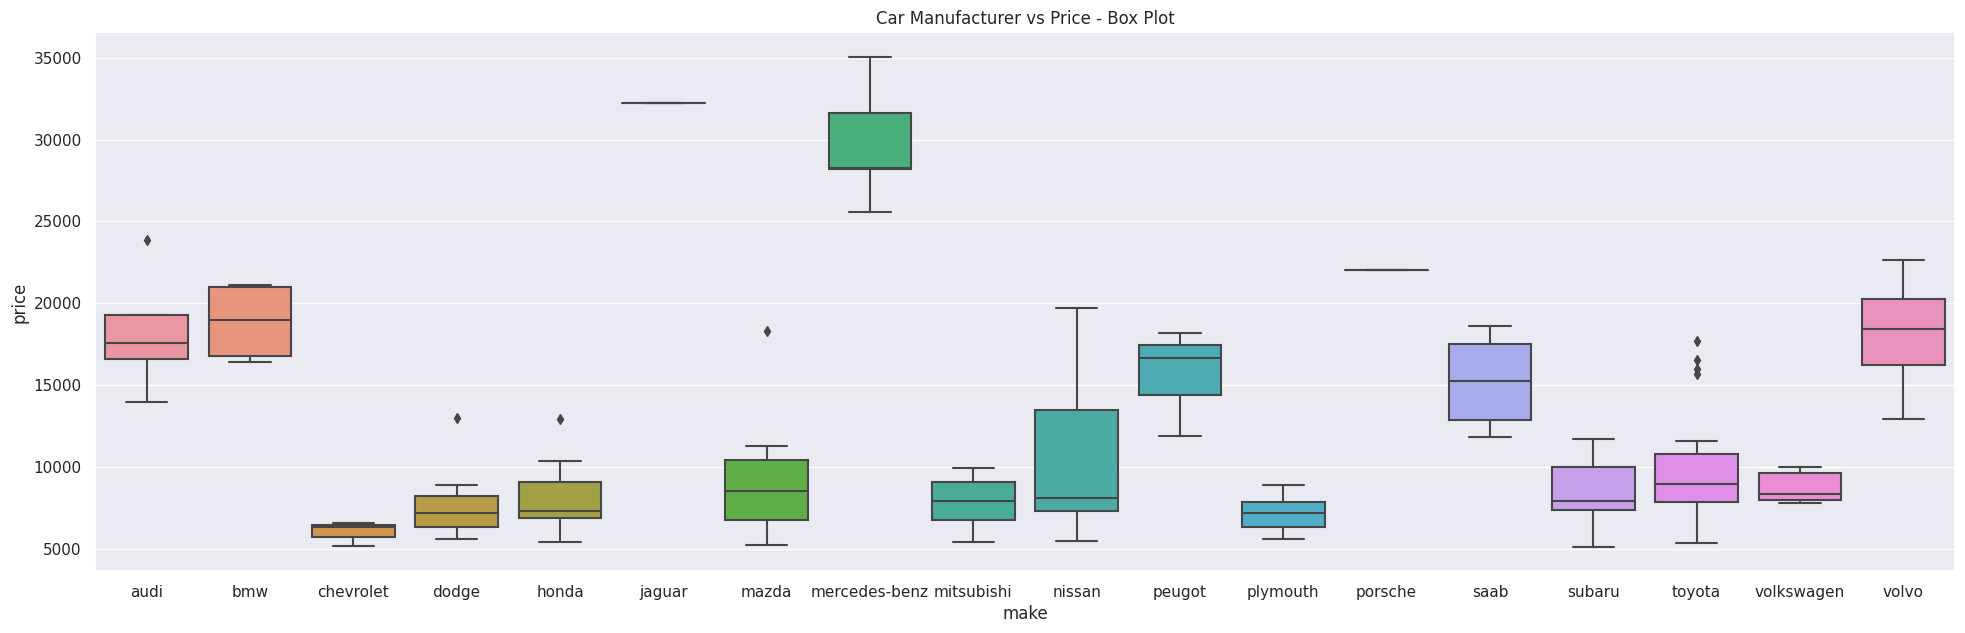

In [24]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=X["make"],y=y).set_title('Car Manufacturer vs Price - Box Plot')

Text(0.5, 1.0, 'Car maker vs Price - Violin Plot')

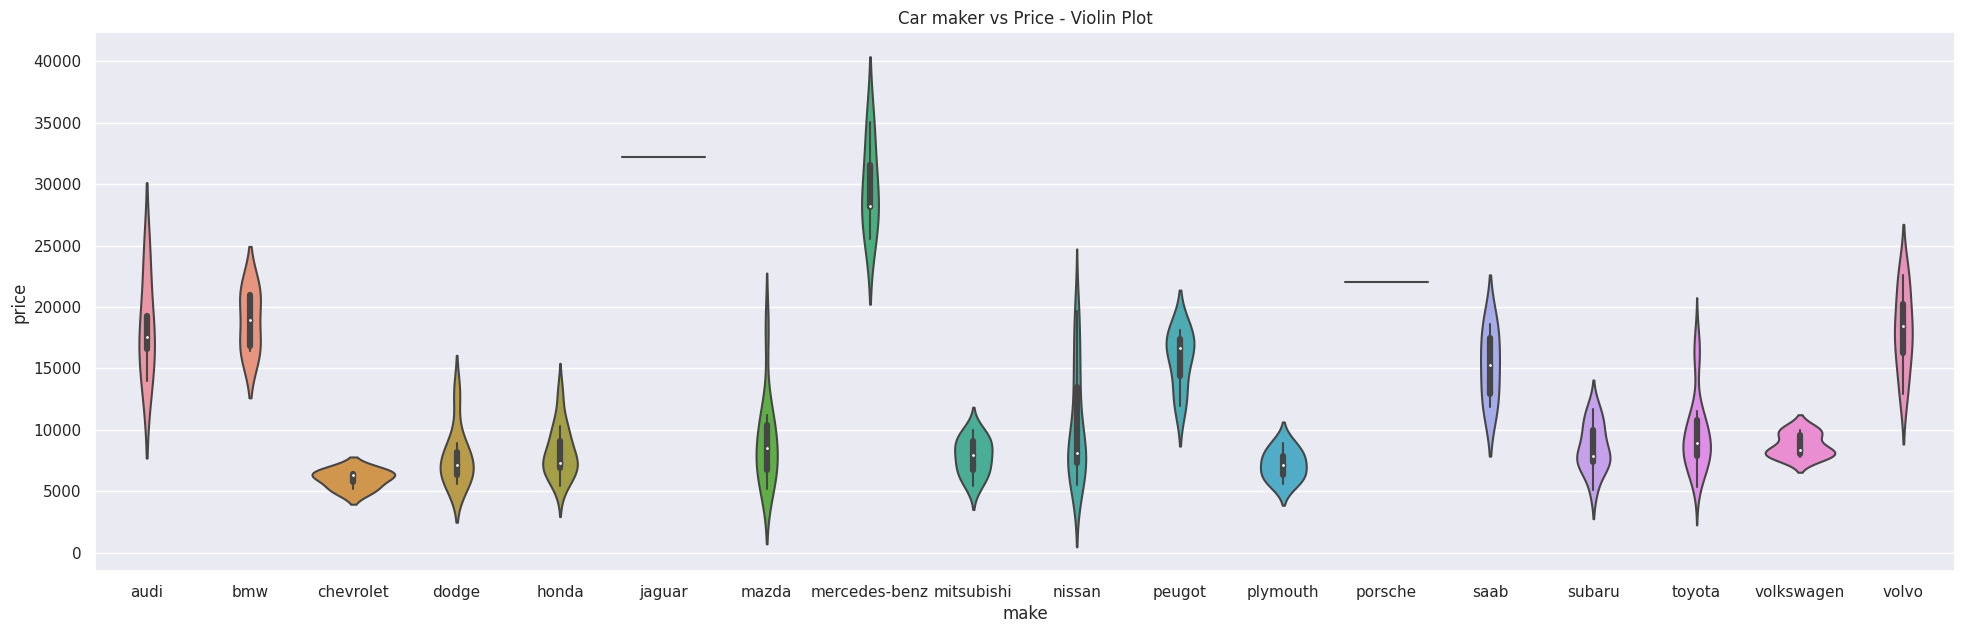

In [25]:
sns.violinplot(x=X["make"],y=y).set_title('Car maker vs Price - Violin Plot')

Text(0.5, 1.0, 'Car maker vs Price Swarm Plot')

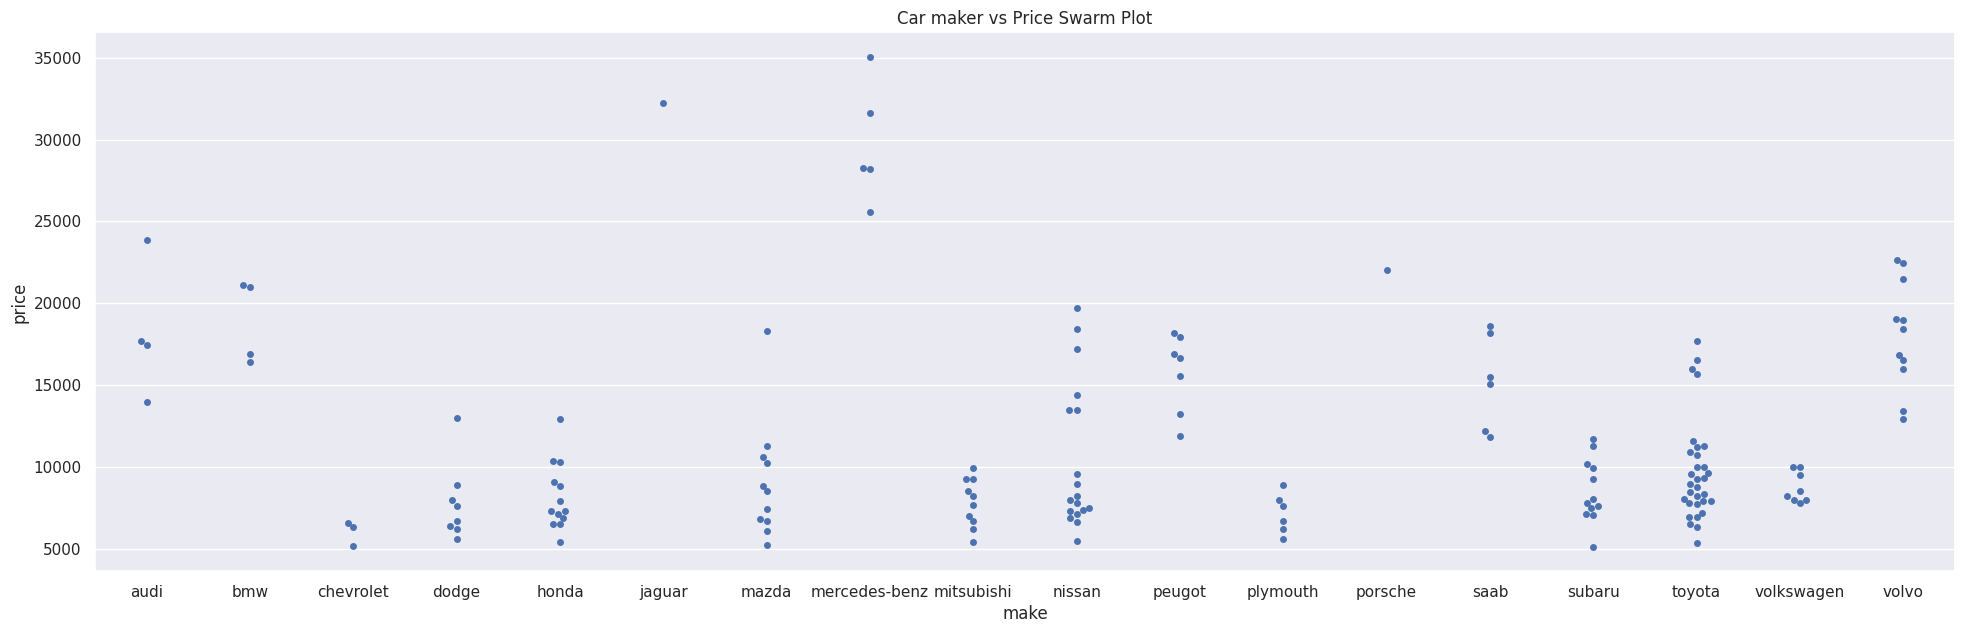

In [26]:
sns.swarmplot(x=X["make"],y=y).set_title('Car maker vs Price Swarm Plot')

Text(0.5, 1.0, 'Car maker vs Horsepower Box Plot')

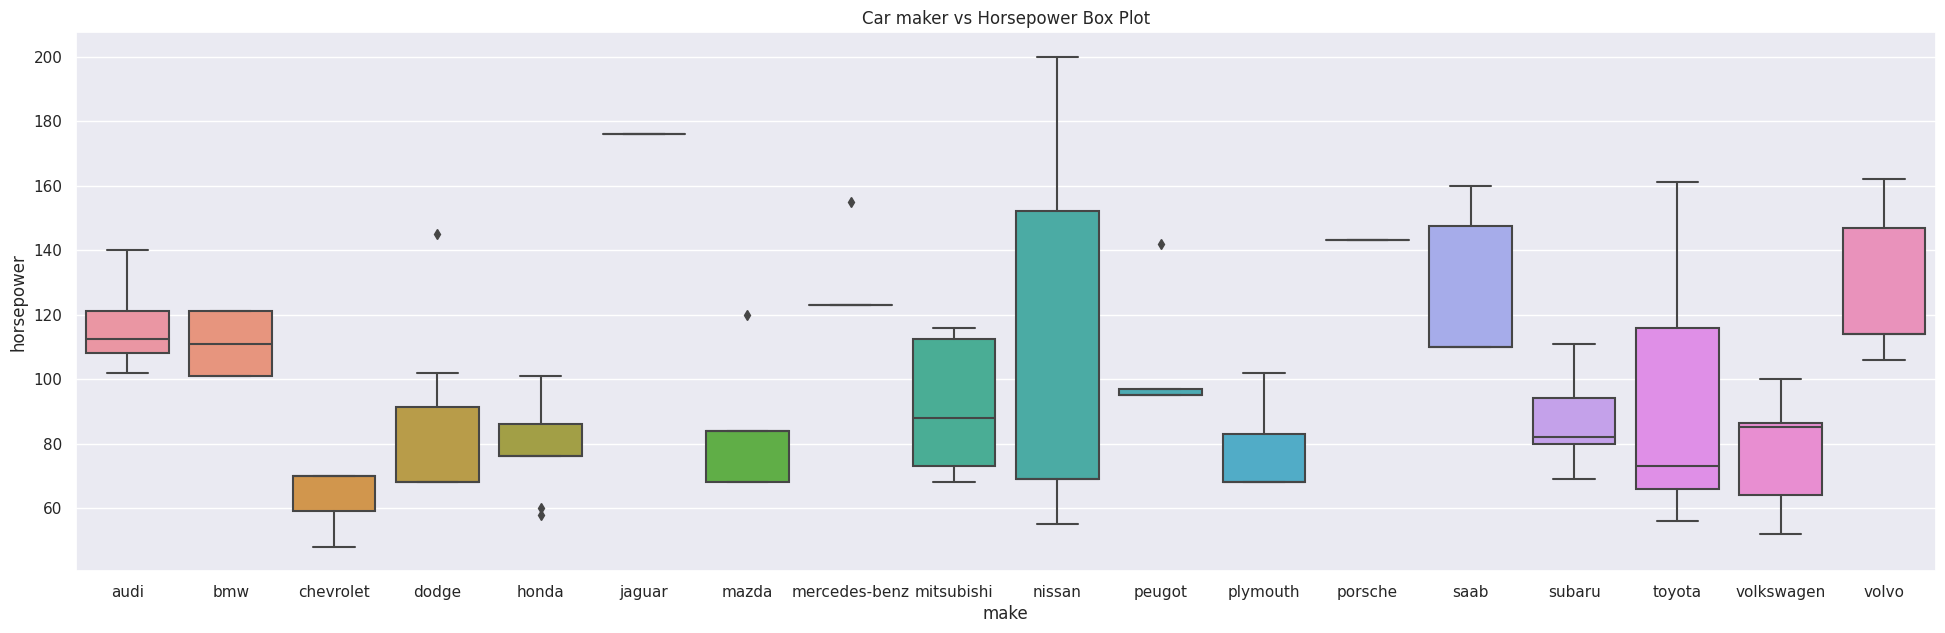

In [27]:
sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"])).set_title('Car maker vs Horsepower Box Plot')

<Axes: xlabel='horsepower', ylabel='price'>

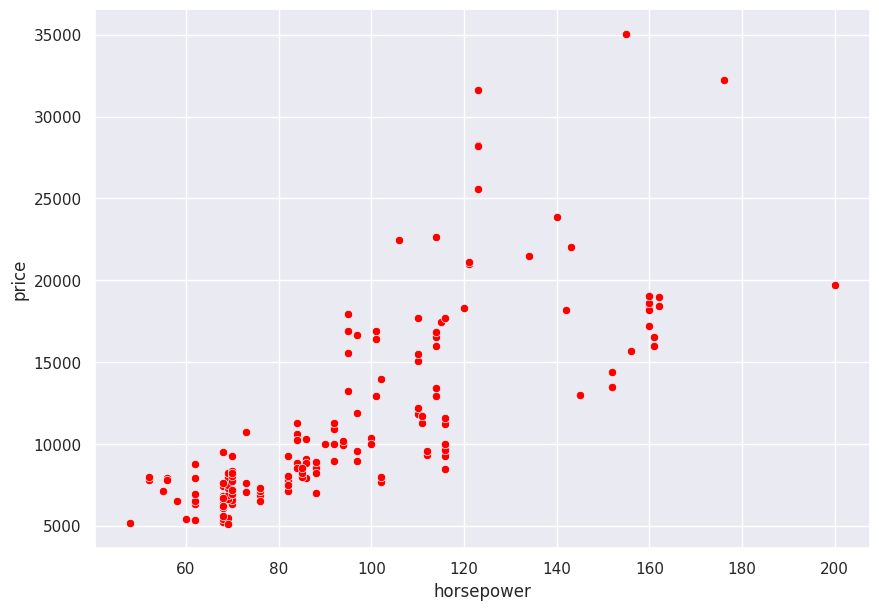

In [28]:
sns.set(rc={'figure.figsize':(10,7)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y = y, color = "red")

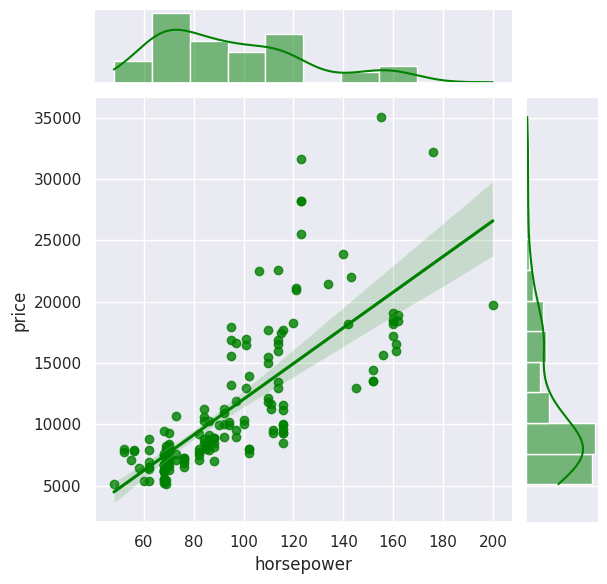

In [29]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y = y, kind="reg", color = 'green')

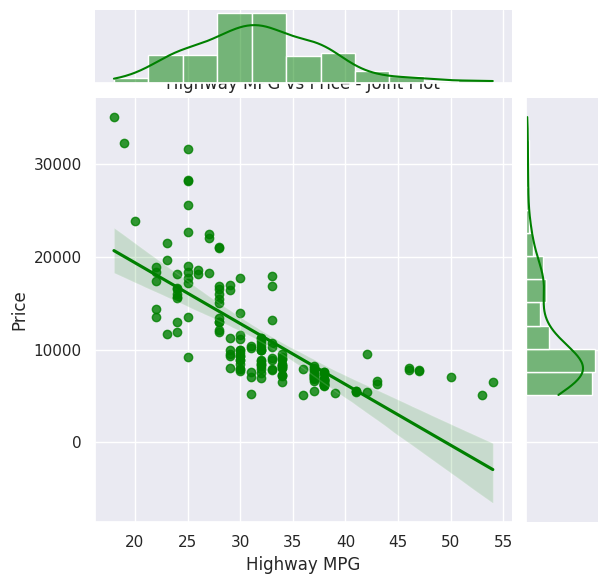

In [31]:
sns.jointplot(x=pd.to_numeric(X["highway-mpg"]), y=y, kind="reg", color='green')
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('Highway MPG vs Price - Joint Plot')
plt.show()


1. To determine the "costliest" body-type based on the maximum/minimum values, we need to analyze the box plot or violin plot. The body-type with the highest maximum price value would be considered the "costliest." Similarly, the body-type with the lowest minimum price value would be considered the "least expensive." By examining the box plot or violin plot, you can identify the body-type with the corresponding extreme values.
2. While maximum and minimum values provide some indication of the costliest body-type, considering the interquartile range (IQR) improves the interpretation. The IQR represents the range between the 25th and 75th percentiles of the data. By examining the IQR, you can understand the spread of prices within each body-type. A larger IQR suggests greater price variability within a body-type, which may impact the overall costliness.
3. The body-style of a car can potentially be a good predictor of its price. From the provided visualizations, it is evident that different body-types exhibit variations in price distribution. However, it is important to note that the body-style alone may not be sufficient to predict the exact price of a car accurately. Other factors such as brand, model, features, and market conditions may also significantly influence the price. Therefore, while body-style can provide some insights into the price, a more comprehensive analysis considering multiple variables would be required for accurate price prediction.